888 ns ± 2.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


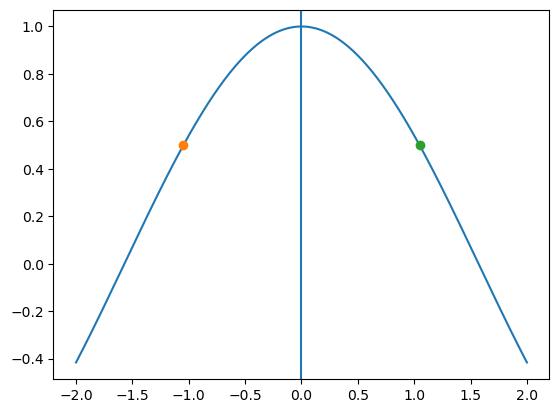

In [4]:
import ChebTools
import teqpflsh
import timeit
import numpy as np 
import matplotlib.pyplot as plt

f = lambda x: np.exp(x)
f = lambda x: x**2-0.5

f = lambda x: np.cos(x)
xmin, xmax = [-2, 2]

# CTce = ChebTools.generate_Chebyshev_expansion(120, f, xmin, xmax)

ces = ChebTools.dyadic_splitting(12, f, xmin, xmax, 3, 1e-12, 12)
ces_ = [teqpflsh.ChebyshevExpansion(xmin=_.xmin(), xmax=_.xmax(), coeff=_.coef()) for _ in ces]
# for _ in ces_:
#     print(_.xmin, _.xmax)
ca = teqpflsh.ChebyshevApproximation1D(expansions=ces_)
# ca.x_at_extrema

# for e in ca.expansions: print(e)
# ca.get_intervals_containing_y(2), ca.x_at_extrema
# ca.get_x_for_y(2, 64, 100), ca.x_at_extrema
# print(len(ca.get_intervals_containing_y(0)))
# for i in ca.monotonic_intervals:
#     print({k: getattr(i,k) for k in dir(i) if not k.startswith('__')})
# for i in ca.get_intervals_containing_y(0):
#     print({k: getattr(i,k) for k in dir(i) if not k.startswith('__')})

N = 10**3
xbuf = np.linspace(xmin, xmax, N)
ybuf = f(xbuf)
plt.plot(xbuf, ybuf)
for x in ca.x_at_extrema:
    plt.axvline(x)

%timeit ca.get_x_for_y(0.5, 64, 100)
for xy in ca.get_x_for_y(0.5, 64, 100):
    plt.plot(xy[0], 0.5, 'o')

In [ ]:
N = 10**6
ybuf = np.random.random((N+1,))+0.3
xbuf = np.zeros_like(ybuf)
print(xbuf.shape, ybuf.shape)
tic = timeit.default_timer()
ca.count_x_for_y_many(ybuf, 64, 100, xbuf)
toc = timeit.default_timer()
print((toc-tic)/len(xbuf)*1e6, 'μs/call')
plt.plot(xbuf, ybuf, 'o')

In [ ]:
import json
j = json.load(open('WATER_exps.json'))
ces_ = [teqpflsh.ChebyshevExpansion(xmin=e_["xmin"], xmax=e_["xmax"], coeff=np.array(e_["coef"])) for e_ in j['jexpansions_rhoL']]
ca = teqpflsh.ChebyshevApproximation1D(expansions=ces_)

y_extremum = ca.eval(ca.x_at_extrema[0])
for y in np.linspace(y_extremum, 0.99999*y_extremum):
    for Tsoln in ca.get_x_for_y(y, 64, 100):
        T, numsteps = Tsoln
#         print(y, T, numsteps)
        plt.plot(T, y*np.ones_like(T), 'o')
    
print(ca.get_x_for_y(55400, 64, 100))
    
T = np.linspace(273.16, 290, 100000)
ybuf = np.zeros_like(T)
tic = timeit.default_timer()
ca.eval_many(T, ybuf)
toc = timeit.default_timer()
print((toc-tic)/len(T)*1e6, 'μs/call')
plt.plot(T, ybuf)

tic = timeit.default_timer()
ybuf = np.linspace(55400, 55440, 1000000)
xbuf = np.zeros_like(ybuf)
ca.count_x_for_y_many(ybuf, 64, 100, xbuf)
toc = timeit.default_timer()
print((toc-tic)/len(xbuf)*1e6, 'μs/call')

In [2]:
j = json.load(open('WATER_exps.json'))
sa = teqpflsh.SuperAncillary(json.dumps(j))
ca = sa.get_approx1d(k='D', Q=0)
y = ca.eval(ca.x_at_extrema[0])*0.9999
Tlims = [_[0] for _ in ca.get_x_for_y(y, 64, 100)]

[sa.get_vaporquality(propval=y,k='D',T=T_) for T_ in np.linspace(*Tlims, 50)]
ca = sa.get_approx1d(k='H', Q=0)

NameError: name 'json' is not defined

In [5]:
%timeit ca.eval_many(xbuf, ybuf)

148 µs ± 753 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
%timeit ce.solve_for_x_many(ybuf, 0, 1, 64, 100, xbuf)

392 ms ± 2.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


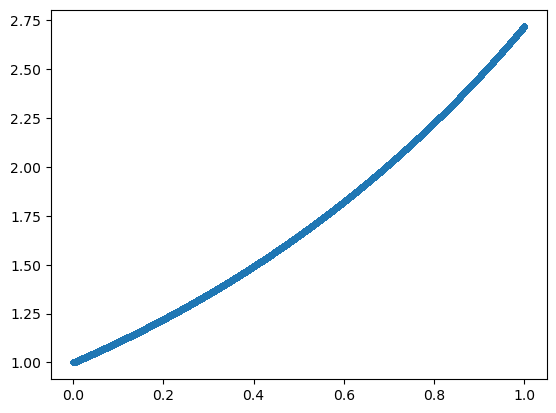

In [7]:
plt.plot(xbuf, ybuf, '.')

In [8]:
for y in np.linspace(1, np.exp(1)):
    f = lambda x: np.exp(x)-y
    interval, N = teqpflsh.toms748_solve(f, 0.0, 1.0, 64, 10)
    print(interval, f(interval), N)

(0.0, 0.0) [0. 0.] 2
(0.03446613582268787, 0.03446613582268787) [0. 0.] 8
(0.06778382959347343, 0.06778382959347343) [0. 0.] 8
(0.100027153980817, 0.100027153980817) [0. 0.] 8
(0.13126323862540326, 0.13126323862540326) [0. 0.] 8
(0.16155311163257136, 0.16155311163257136) [0. 0.] 8
(0.19095241731932389, 0.19095241731932389) [0. 0.] 8
(0.21951203143028214, 0.21951203143028214) [0. 0.] 8
(0.24727859091150584, 0.24727859091150584) [0. 0.] 8
(0.2742949520977852, 0.2742949520977852) [0. 0.] 8
(0.3006005886164997, 0.3006005886164997) [0. 0.] 8
(0.3262319382822653, 0.3262319382822653) [0. 0.] 8
(0.3512227066335552, 0.3512227066335552) [0. 0.] 8
(0.3756041334561368, 0.3756041334561368) [0. 0.] 8
(0.3994052275806915, 0.3994052275806915) [0. 0.] 8
(0.42265297438124005, 0.42265297438124005) [0. 0.] 8
(0.4453725196967728, 0.4453725196967728) [0. 0.] 8
(0.46758733331945074, 0.46758733331945074) [0. 0.] 8
(0.4893193547144178, 0.4893193547144178) [0. 0.] 8
(0.5105891232393562, 0.5105891232393562) [0. 

In [10]:
ca = teqpflsh.ChebyshevApproximation(expansions=[ce])
for e in ca.expansions:
    print(e)
ca.get_intervals_containing_y(2)

[]